In [22]:
#import required packages 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import glob




In [23]:
input_path = "./Sample_images/*.jpg"
input_img_count = 0
for img in glob.glob(input_path):
    if img.endswith(".jpg"):
        input_img_count = input_img_count + 1
        input_img = cv2.imread(img)
    
        
        scale_percent = 8 #percent of original image size
        width = int(input_img.shape[1]* scale_percent/100)
        height = int(input_img.shape[0]* scale_percent/100)
        dim = (width, height)
        input_img_resized = cv2.resize(input_img, dim, interpolation = cv2.INTER_AREA)
        thresh, input_img_bw = cv2.threshold(input_img_resized,50,250,cv2.THRESH_BINARY)
        

        img = img.replace('.jpg','')
        img = img + " processed"
        print(img)
        img_list = cv2.imwrite("%s.png"% img, input_img_bw)
    else:
        continue 
            


./Sample_images/img8 processed
./Sample_images/img5 processed
./Sample_images/img4 processed
./Sample_images/img6 processed
./Sample_images/img7 processed
./Sample_images/img3 processed
./Sample_images/img2 processed
./Sample_images/img1 processed


Images:  ['1_0.46.jpg', '2_0.82.jpg', '3_1.06.jpg', '4_0.58.jpg', '5_0.94.jpg', '6_1.12.jpg', '7_0.70.jpg', '8_1.00.jpg', '9_1.32.jpg']
Images count:  9
1 / 9 :  1_0.46.jpg
2 / 9 :  2_0.82.jpg
3 / 9 :  3_1.06.jpg
4 / 9 :  4_0.58.jpg
5 / 9 :  5_0.94.jpg
6 / 9 :  6_1.12.jpg
7 / 9 :  7_0.70.jpg
8 / 9 :  8_1.00.jpg
9 / 9 :  9_1.32.jpg


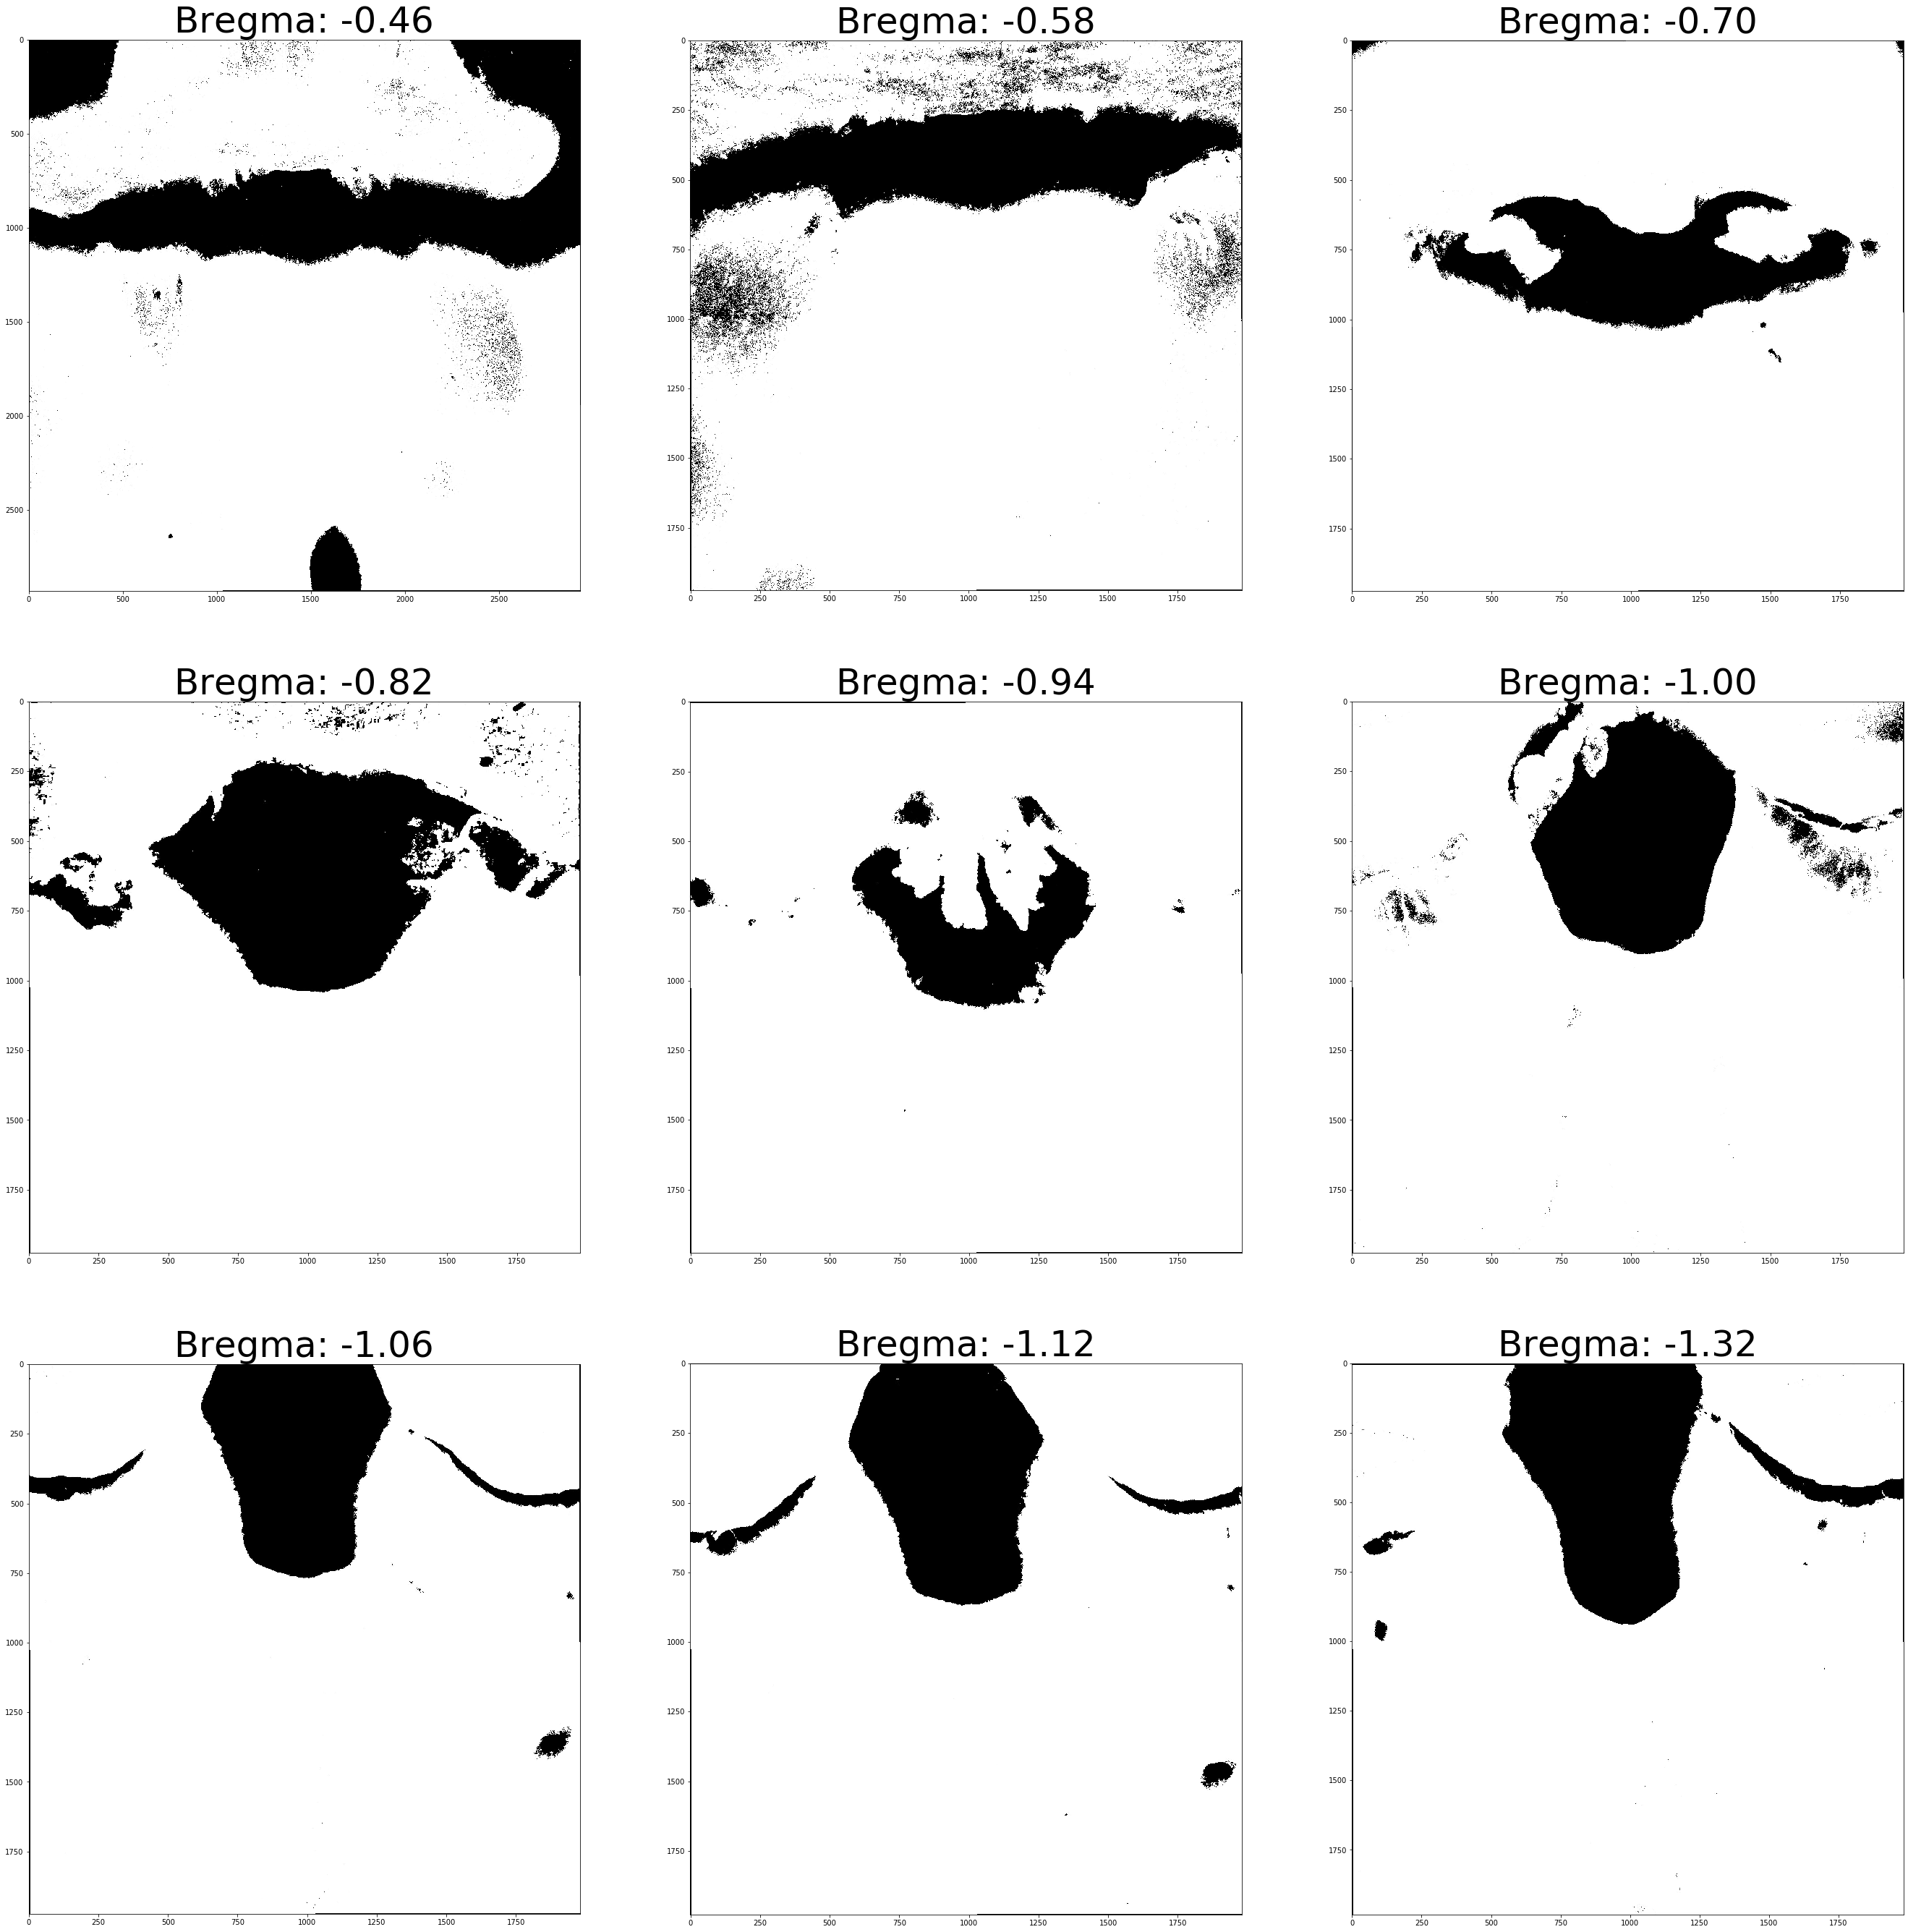

In [24]:
   
    
    import math

    #load reference image file and set output file name
    template_img_dir = './Reference_images'
    result_grid_filename = './grid.jpg'
    result_figsize_resolution = 40 # 1 = 100px

    #create list variable that lists files in reference images, and length variable for counting iterations 
    images_list = sorted(os.listdir(template_img_dir))
    images_count = len(images_list)
    print('Images: ', images_list)
    print('Images count: ', images_count)

    # Calculate the grid size:
    grid_size = math.ceil(math.sqrt(images_count))

    # Create plt plot:
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(result_figsize_resolution, result_figsize_resolution))


    current_file_number = 0

    # create an image grid of reference images that will be compared to the input image. 
    for image_filename in images_list:
        x_position = current_file_number % grid_size
        y_position = current_file_number // grid_size
        plt_image = plt.imread(template_img_dir + '/' + images_list[current_file_number])
        axes[x_position, y_position].imshow(plt_image)

        axes[0,0].set_title('Bregma: -0.46', fontsize=50)
        axes[0,1].set_title('Bregma: -0.58', fontsize=50)
        axes[0,2].set_title('Bregma: -0.70', fontsize=50)
        axes[1,0].set_title('Bregma: -0.82', fontsize=50)
        axes[1,1].set_title('Bregma: -0.94', fontsize=50)
        axes[1,2].set_title('Bregma: -1.00', fontsize=50)
        axes[2,0].set_title('Bregma: -1.06', fontsize=50)
        axes[2,1].set_title('Bregma: -1.12', fontsize=50)
        axes[2,2].set_title('Bregma: -1.32', fontsize=50)

        print((current_file_number + 1), '/', images_count, ': ', image_filename)

        current_file_number += 1

    plt.subplots_adjust(left=0.0, right=.9, bottom=0.0, top=.9)
    plt.savefig(result_grid_filename)

In [25]:
type(input_img)

numpy.ndarray

In [26]:
#save template grid for future reference 
template_grid = cv2.imread('./grid.jpg')
    
#resize template grid
scale_percent = 25 #percent of original image size
temp_width = int(template_grid.shape[1] * scale_percent/100)
temp_height = int(template_grid.shape[0]* scale_percent/100)
temp_dim = (temp_width, temp_height)
template_grid= cv2.resize(template_grid, temp_dim, interpolation = cv2.INTER_AREA)
    
#match template grid to sample/input image and frame reference image with most similarity 


        
res = cv2.matchTemplate(input_img_bw, template_grid, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
top_left = max_loc
bottom_right = (top_left[0] + width, top_left[1]+height)


cv2.rectangle(template_grid, top_left, bottom_right, 255, 2)


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[128, 128, 128],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[128, 128, 128],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[106, 106, 106],
        [203, 203, 203],
        [204, 204, 204],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [29]:
#save framed grid to Processed images file './Processed_images/___.jpg', before running code set file name that corresponds to original input image 
output_path = './Processed_images/' 
for img in glob.glob(output_path):
    output_img_count = 0
    status = cv2.imwrite("grid w/ output_filepath%s.png" %output_img_count, template_grid)
    output_img_count +=1
#double check that file has saved 
print('Images have been saved: ', status) 

Images have been saved:  False


In [12]:

for img in glob.glob(input_path):
    if img.endswith(".jpg"):
        input_img_count = input_img_count + 1
        input_img = cv2.imread(img)

SyntaxError: invalid syntax (<ipython-input-16-a76618815776>, line 12)

In [10]:
#print bregma coordinates based on where rectangle is located in grid-in progress-

if bottom_right[0] == 694:
    print('Bregma coordinates are:', bottom_right[1]) 

In [ ]:
#shows image grid in new window; blue square indicates closest match
cv2.imshow('temp', template_grid)

cv2.waitKey(0)
cv2.destroyAllWindows()